<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [12]</a>'.</span>

# Reading the data into python

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# parameters
current_time=''
batch_id=''
source_data=''
source_notebook=''
preprocessed_data=''
unprocessed_data=''

In [3]:
# Parameters
current_time = "15_03_2022__00_00_00"
batch_id = "1000"
source_data = ".//data//source//BigBasket.xlsx"
source_notebook = ".//notebooks//input//Grocery_Data_Preprocessing.ipynb"
preprocessed_data = ".//data//processed//1000_15_03_2022__00_00_00_BigBasket.csv"
unprocessed_data = ".//data//unprocessed//1000_15_03_2022__00_00_00_unprocessed_.//data//source//BigBasket.csv"


In [4]:
# update the batch status  to 1 (Running)

In [5]:
# Reading the dataset
import pandas as pd
import numpy as np

inventory_df = pd.read_excel(open(source_data, 'rb'),
              sheet_name='Sheet1')  

inventory_df.head()

,Unnamed: 0,Brand,Product,Quantity,Price,MRP,Category,Sub-Category,image_small
0,0.0,iD Fresho,"Idly Dosa Batter, 1 Kg + Malabar Parota, 350 g",Combo 2 Items,116.0,155.0,snacks branded foods,ready to cook eat,https://www.bigbasket.com/media/uploads/p/s/12...
1,1.0,iD Fresho,Malabar Parota/Paratha,350 g Pouch,42.0,80.0,snacks branded foods,ready to cook eat,https://www.bigbasket.com/media/uploads/p/s/30...
2,2.0,iD Fresho,"Whole Wheat Parota, 350 g + Malabar Parota, 350 g",Combo 2 Items,84.0,160.0,snacks branded foods,ready to cook eat,https://www.bigbasket.com/media/uploads/p/s/12...
3,3.0,iD,Wheat Chapati,350 g,70.0,70.0,snacks branded foods,ready to cook eat,https://www.bigbasket.com/media/uploads/p/s/30...
4,4.0,MTR,Breakfast Mix - Khaman Dhokla,160 g Pouch,57.0,60.0,snacks branded foods,ready to cook eat,https://www.bigbasket.com/media/uploads/p/s/40...


In [6]:
print('Shape before deleting duplicate values:', inventory_df.shape)

# Removing duplicate rows if any
inventory_df = inventory_df.drop_duplicates()
print('Shape After deleting duplicate values:', inventory_df.shape)

# Printing sample data
inventory_df.sample(5)

Shape before deleting duplicate values: (18382, 9)
Shape After deleting duplicate values: (18382, 9)


,Unnamed: 0,Brand,Product,Quantity,Price,MRP,Category,Sub-Category,image_small
7161,7161.0,Fresho,Sapota - Organically Grown,500 g,35.00,43.75,fruits vegetables,fresh fruits,https://www.bigbasket.com/media/uploads/p/s/40...
15874,15874.0,Dabur,Hommade - Kalonji Tamatar Ki Chutney,200 gm,61.75,65.00,snacks branded foods,pickles chutney,https://www.bigbasket.com/media/uploads/p/s/40...
8861,8861.0,Nutriplate India,Rolled Oats,500 g Pouch,175.00,175.00,gourmet world food,cereals breakfast,https://www.bigbasket.com/media/uploads/p/s/40...
14451,14451.0,Fresho,Chicken Biryani Cut 1kg + Chicken Chilli Piec...,Combo 2 Items,488.00,640.00,eggs meat fish,poultry,https://www.bigbasket.com/media/uploads/p/s/12...
13944,13944.0,BB Home,Steel Atta/Maida/Dough Parat Plate - No. 13,1 pc,229.00,299.00,kitchen garden pets,steel utensils,https://www.bigbasket.com/media/uploads/p/s/40...


# Defining the problem statement

#### Create a predictive model which gives relevant products recommendations

Predictors: Category, Sub Category, Brand Name, Product Rating, Name

# Basic Data Exploration

In [7]:
# Looking at the sample rows in the data
inventory_df.sample(5)

,Unnamed: 0,Brand,Product,Quantity,Price,MRP,Category,Sub-Category,image_small
11225,11225.0,Himalaya,Soap - Neem & Turmeric,6x125 g Multipack,219.3,300.0,beauty hygiene,bath face hand wash,https://www.bigbasket.com/media/uploads/p/s/12...
13677,13677.0,Garnier Men,Power White Anti-Pollution Double Action Face ...,50 g,89.1,99.0,beauty hygiene,skin care,https://www.bigbasket.com/media/uploads/p/s/40...
11085,11085.0,Milky Mist,Shrikhand - Elaichi,100 g Cup,30.0,35.0,bakery cakes dairy,dairy,https://www.bigbasket.com/media/uploads/p/s/40...
11815,11815.0,Nescafe Gold,Espresso Rich with Velvety Crema,100 g Bottle,999.0,999.0,gourmet world food,drinks beverages,https://www.bigbasket.com/media/uploads/p/s/40...
14883,14883.0,bb Combo,Sirona Feminine Pain Relief Patches 5pcs+ Veet...,Combo 2 Items,375.2,484.0,beauty hygiene,feminine hygiene,https://www.bigbasket.com/media/uploads/p/s/12...


In [8]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18382 entries, 0 to 18381
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18382 non-null  float64
 1   Brand         18381 non-null  object 
 2   Product       18380 non-null  object 
 3   Quantity      18382 non-null  object 
 4   Price         18382 non-null  float64
 5   MRP           18382 non-null  float64
 6   Category      18382 non-null  object 
 7   Sub-Category  18382 non-null  object 
 8   image_small   18382 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [9]:
# Looking at the descriptive statistics of the data
inventory_df.describe(include='all')

,Unnamed: 0,Brand,Product,Quantity,Price,MRP,Category,Sub-Category,image_small
count,18382.00000,18381,18380,18382,18382.000000,18382.000000,18382,18382,18382
unique,NaN,1541,11439,2952,NaN,NaN,11,96,12484
top,NaN,Fresho,Soft Drink,1 pc,NaN,NaN,gourmet world food,spreads sauces ketchup,https://www.bbassets.com/static/images/product...
freq,NaN,1288,23,1227,NaN,NaN,2655,432,17
mean,9190.50000,NaN,NaN,NaN,279.695053,351.521433,NaN,NaN,NaN
std,5306.57066,NaN,NaN,NaN,397.128798,520.388793,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN
25%,4595.25000,NaN,NaN,NaN,82.000000,99.000000,NaN,NaN,NaN
50%,9190.50000,NaN,NaN,NaN,169.000000,200.000000,NaN,NaN,NaN
75%,13785.75000,NaN,NaN,NaN,324.000000,399.000000,NaN,NaN,NaN


In [10]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
inventory_df.nunique()

Unnamed: 0      18382
Brand            1541
Product         11439
Quantity         2952
Price            2522
MRP              1124
Category           11
Sub-Category       96
image_small     12484
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, we can create a simple report of the data, noting down the observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.

- Category     : Selected. Categorical.
- Sub Category : Selected. Categorical.
- Brand Name   : Selected. Categorical.
- Product Name: Selected. Categorical.
- Name         : Selected. Categorical.
- Weight       : Selected. Continuous.
- MRP/Unit     : Selected. Continuous.
- Qnty         : Selected. Continuous.
- Unit Qnty    : Selected. Continuous.
- Cost Price   : Selected. Continuous.
- Product ID   : Selected. Continuous.
- Product rating : Selected. Continuous.

# Visual Exploratory Data Analysis

Categorical variables: Bar plot

Continuous variables: Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

KeyError: 'Sub Category'

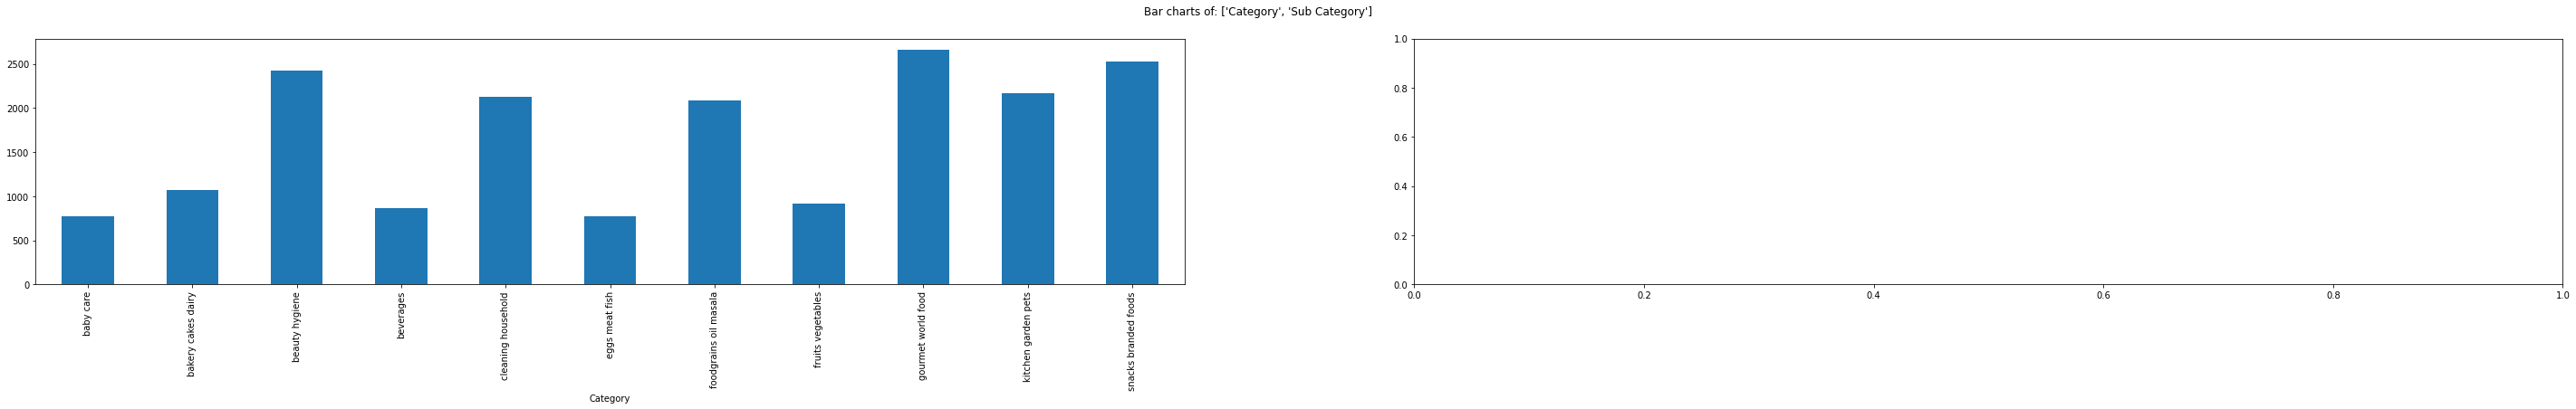

In [12]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Category', 'Sub Category'])

In [ ]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Brand Name', 'Name '])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In this data, all the categorical columns except "Brand Name", "Name" and "Product Name" have satisfactory distribution for machine learning.

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

In [ ]:
# Plotting histograms of multiple columns together

inventory_df.hist(['MRP/Unit', 'Qnty', 'Product Rating'], figsize=(10, 5))

In [ ]:
# Plotting histograms of multiple columns together

inventory_df.hist(['Unit Qnty', 'Cost Price', 'Product ID'], figsize=(18,10))

# Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

- MRP/Unit   : Selected. Slightly skewed distribution, acceptable.
- Qnty       : Selected. Slightly skewed distribution, acceptable.
- Unit Qnty  : Selected. Skewed distribution, not acceptable.
- Cost Price : Selected. Slightly skewed distribution, acceptable.


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

In this data all the continuous variables have slightly skewed distribution, which is acceptable, hence no outlier treatment is required.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
inventory_df.isnull().sum()

In [ ]:
inventory_df.replace('', np.nan, inplace=True)

In [ ]:
inventory_df.dropna(inplace=True)

# Finding how many missing values are there for each column
inventory_df.isnull().sum()

All the missing values are removed now.

# Data Cleansing

In [ ]:
# Removing the leading and trailing spaces of columns
inventory_df.columns = inventory_df.columns.str.strip()

In [ ]:
inventory_df.columns

# Find Correalation between attributes

In [ ]:
# To find the correlation among
# the columns using pearson method
inventory_df.corr(method ='pearson')

# Save the file into local machine

In [ ]:
inventory_df.to_csv(preprocessed_data)

In [ ]:
# update the batch status  to 2 (Completed Successfully)